In [1]:
#Importing needed libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
#Comment the line below if you want interactive plots
pio.renderers.default = "jpeg"

In [2]:
#Importing data
url = 'https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [3]:
#Lets see if it works.
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
print("This dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))

This dataset has 9994 rows and 13 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#How many NaN values?
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
#How many Duplicates?
df.duplicated().sum()

17

In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

As per the above we have 4 shipping methods

In [11]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

As per the above we have 3 "segments"

For 'Country' is obviously United States

For 'City', 'State' & 'Postal Code'are geo-specific info

In [12]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [13]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

3 Main product categories 

In [14]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

17 Sub product categories 

In [15]:
#Lets do some quick cleaning, first by removing the unused features
df.drop(['Country'],axis=1,inplace=True)
#Then by removing Duplicates 
df.drop_duplicates(inplace=True)

In [16]:
print('Number of dupicates is', df.duplicated().sum())

Number of dupicates is 0


In [17]:
#Uncomment the 2 lines below to see colors that can be used with the sunbrust color_continuous_scale
#fig = px.colors.sequential.swatches_continuous()
#fig.show()

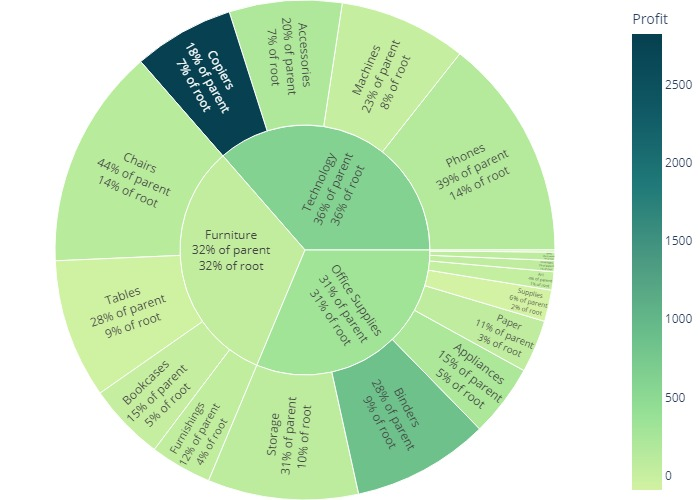

In [18]:
#Lets start the plots, first lets take a look at the product category and sub-category sales and color them by Profit
fig = px.sunburst(df,
                  path=['Category','Sub-Category'],
                  values='Sales',
                  color='Profit',
                  hover_data =['Sales'],
                  color_continuous_scale='emrld',
                 )
fig.update_traces(textinfo="label+percent parent+percent root",
                 insidetextorientation='radial')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0),)
fig.show()

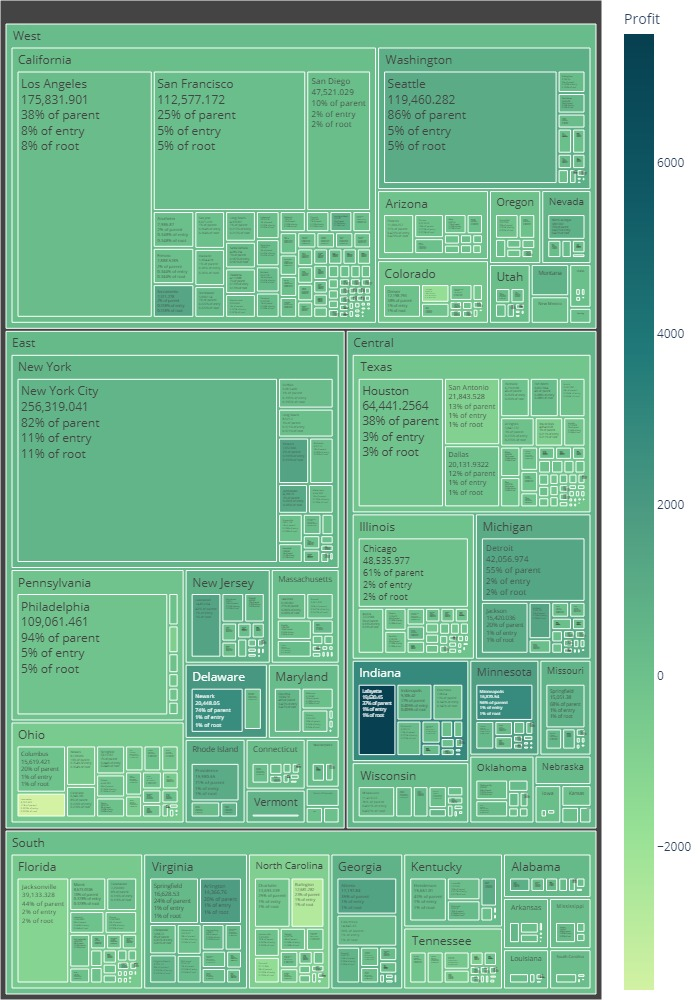

In [19]:
#Secondly lets look at the Sales by Region then State then City, then size them by Sales color by profit
fig = px.treemap(df,path=['Region','State','City'],
                 values='Sales',
                 color='Profit',
                 color_continuous_scale='emrld'
)
fig.update_layout(height=1000)
fig.data[0].textinfo = 'label+text+value+percent parent+percent entry+percent root'
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0),)
fig.show()

In [20]:
#Lets drill down on Sub-Category Sales & Profit.
#First lets make a new df for some quick changes
d = []
for i in df['Sub-Category'].unique():
    sales = round(df[df['Sub-Category']==i]['Sales'].sum(),2)
    profit = round(df[df['Sub-Category']==i]['Profit'].sum(),2)
    d.append([i,sales,profit])
df2 = pd.DataFrame(d,columns=['Sub-Category','Sales','Profit'])
df2 = df2.sort_values('Sales',ascending=True)

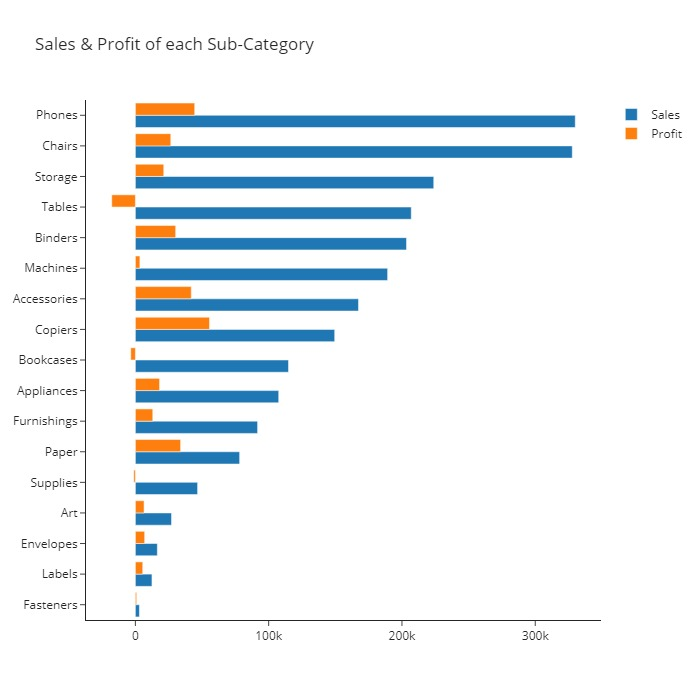

In [21]:
#Lets Plot the above
fig = go.Figure(data=[
    go.Bar(
        name='Sales',
        x=df2['Sales'],
        y=df2['Sub-Category'],
        orientation='h',
    ),
    go.Bar(
        name='Profit',
        x=df2['Profit'],
        y=df2['Sub-Category'],
        orientation='h',
    )
]
               )
fig.update_layout(template='simple_white',title='Sales & Profit of each Sub-Category',height=700)
fig.show()

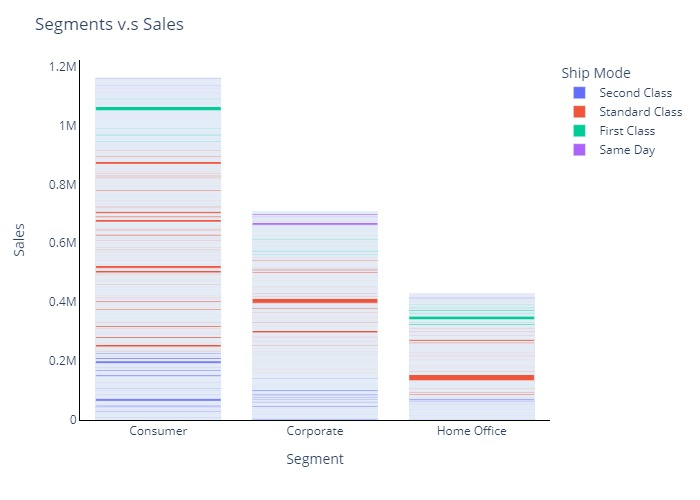

In [22]:
#Lastly lets look Segments vs Sales, and see the impact of Ship Mode
fig = px.bar(
    df, 
    x = 'Segment',
    y = 'Sales',
    color = 'Ship Mode' 
)
fig.update_layout(
    title = 'Segments v.s Sales',
    xaxis_title = 'Segment',
    yaxis_title = 'Sales',
    xaxis = dict(
        showline = True, 
        linecolor = 'black'
    ),
    yaxis = dict(
        showline = True, 
        linecolor = 'black'
    ),
    plot_bgcolor = 'white'
)
fig.show()